# functions

# EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import plotly.express as px

%matplotlib inline

In [3]:
data = pd.read_csv('Movie_classification.csv')
df = data.copy()

In [4]:
df['Time_taken'].fillna(df['Time_taken'].median(), inplace=True)
df.loc[df['Time_taken'] == 0] = df['Time_taken'].median()
df['Time_taken']

In [5]:
df = pd.get_dummies(data=df, columns=['Genre'], drop_first=True)
df

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,0,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,0,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,6.80,...,186.96,243.584,27,561,44800,0,1,0,0,0
502,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,7.80,...,132.24,263.296,20,600,41200,0,1,0,0,0
503,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,7.80,...,109.56,243.824,31,576,47800,0,0,1,0,0
504,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,6.80,...,158.80,303.520,47,607,44000,0,0,1,0,0


In [6]:
df['3D_available'].value_counts()

In [7]:
df.drop([50, 112], inplace=True)

In [8]:
df['3D_available'].value_counts()

In [9]:
df['3D_available'].replace('NO', 0, inplace=True)
df['3D_available'].replace('YES', 1, inplace=True)

df['3D_available'].value_counts()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 0 to 505
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    504 non-null    float64
 1   Production expense   504 non-null    float64
 2   Multiplex coverage   504 non-null    float64
 3   Budget               504 non-null    float64
 4   Movie_length         504 non-null    float64
 5   Lead_ Actor_Rating   504 non-null    float64
 6   Lead_Actress_rating  504 non-null    float64
 7   Director_rating      504 non-null    float64
 8   Producer_rating      504 non-null    float64
 9   Critic_rating        504 non-null    float64
 10  Trailer_views        504 non-null    int64  
 11  3D_available         504 non-null    int64  
 12  Time_taken           504 non-null    float64
 13  Twitter_hastags      504 non-null    float64
 14  Avg_age_actors       504 non-null    int64  
 15  Num_multiplex        504 non-null    int

In [11]:
df

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,0,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,0,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,6.80,...,186.96,243.584,27,561,44800,0,1,0,0,0
502,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,7.80,...,132.24,263.296,20,600,41200,0,1,0,0,0
503,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,7.80,...,109.56,243.824,31,576,47800,0,0,1,0,0
504,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,6.80,...,158.80,303.520,47,607,44000,0,0,1,0,0


<AxesSubplot:>

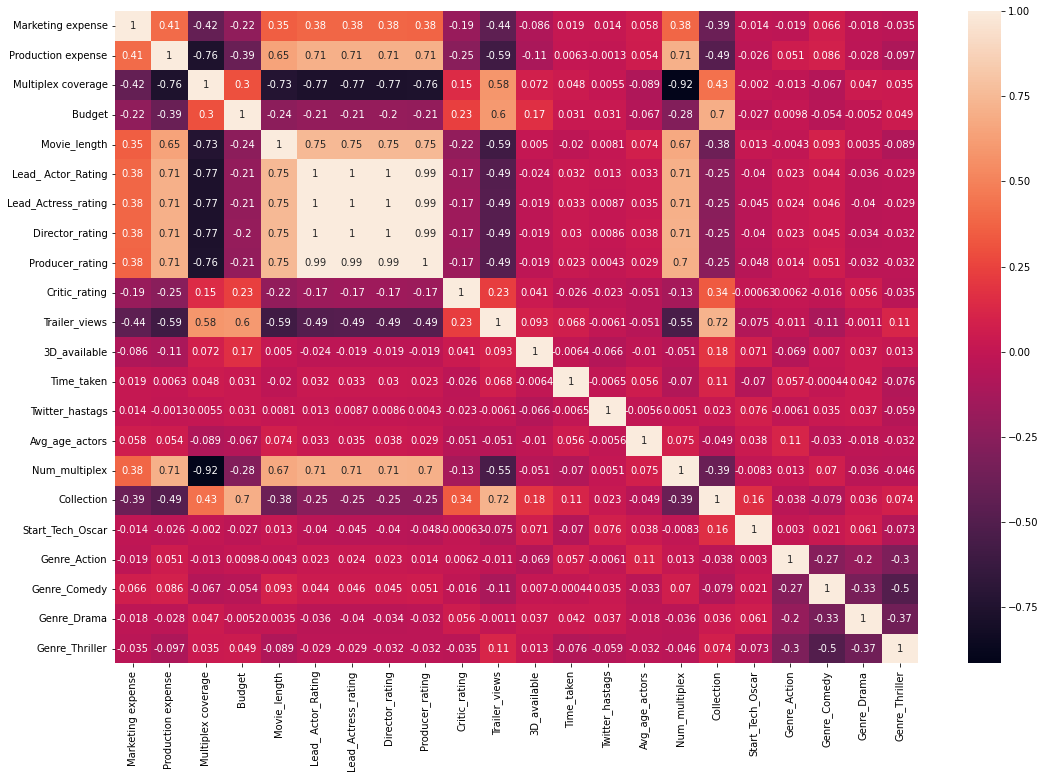

In [12]:
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=True)

In [13]:
df_aux = pd.DataFrame()
df_aux['Feature'] = df.columns
df_aux['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

df_aux

,Feature,VIF
0,Marketing expense,1.391855
1,Production expense,3.095347
2,Multiplex coverage,8.972312
3,Budget,2.251423
4,Movie_length,3.031297
5,Lead_ Actor_Rating,319.341237
6,Lead_Actress_rating,365.529447
7,Director_rating,346.618154
8,Producer_rating,98.904991
9,Critic_rating,1.223026


In [14]:
lista = df_aux['Feature'].drop([2, 5, 6, 7], axis=0)
lista.index

Int64Index([0, 1, 3, 4, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], dtype='int64')

<AxesSubplot:>

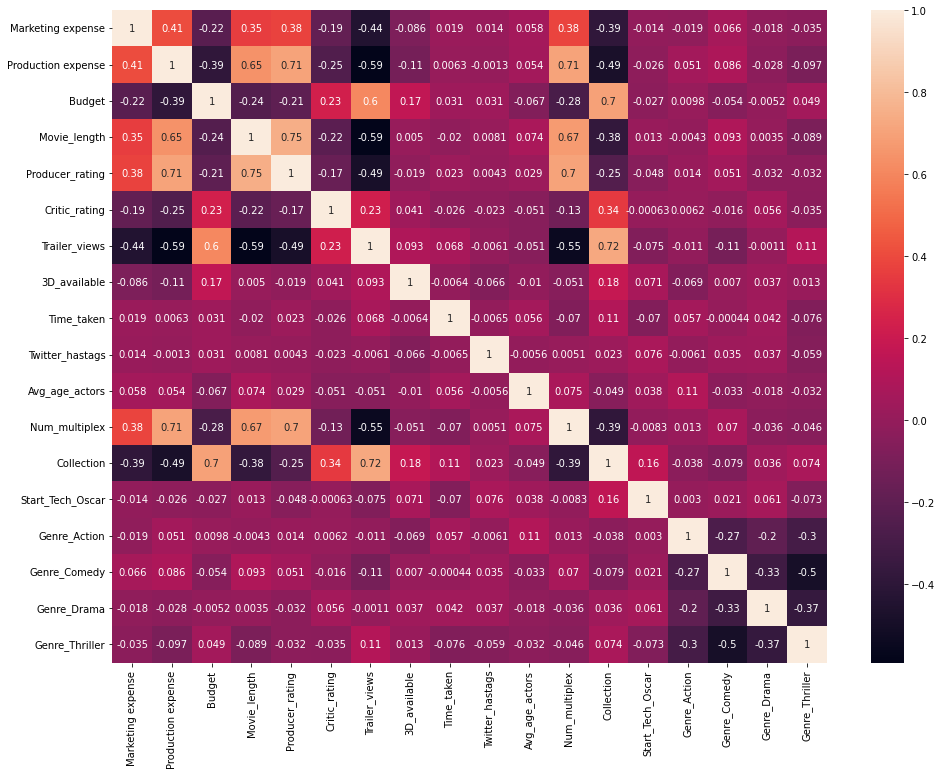

In [15]:
plt.figure(figsize=(16, 12))
sns.heatmap(df[lista].corr(), annot=True)

In [16]:
x = df.drop('Start_Tech_Oscar', axis=1)
x_aux = df[lista].drop('Start_Tech_Oscar', axis=1)
df.loc[df['Start_Tech_Oscar'] == 0] = 'no'
df.loc[df['Start_Tech_Oscar'] == 1] = 'yes'
y = df['Start_Tech_Oscar']
x_aux

,Marketing expense,Production expense,Budget,Movie_length,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,36524.125,138.7,7.995,7.94,527367,1,109.60,223.840,23,494,48000,0,0,0,1
1,20.5462,69.14,35668.655,152.4,7.470,7.44,494055,0,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,39912.675,134.6,7.515,7.44,547051,0,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,38873.890,119.3,7.020,8.26,516279,1,185.36,225.344,45,472,66800,0,0,1,0
4,21.3810,59.36,39701.585,127.7,7.070,8.26,531448,0,176.48,225.792,55,395,72400,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,21.2526,78.86,36624.115,142.6,8.970,6.80,492480,0,186.96,243.584,27,561,44800,1,0,0,0
502,20.9054,78.86,33996.600,150.2,8.930,7.80,482875,1,132.24,263.296,20,600,41200,1,0,0,0
503,21.2152,78.86,38751.680,164.5,9.010,7.80,532239,0,109.56,243.824,31,576,47800,0,1,0,0
504,22.1918,78.86,37740.670,162.8,8.845,6.80,496077,1,158.80,303.520,47,607,44000,0,1,0,0


In [17]:
scaler = MinMaxScaler()
x_aux = pd.DataFrame(scaler.fit_transform(x_aux), index=x_aux.index, columns=x_aux.columns)

x = pd.DataFrame(scaler.fit_transform(x), index=x.index, columns=x.columns)

In [18]:
x_aux

,Marketing expense,Production expense,Budget,Movie_length,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller
0,0.000000,0.067815,0.577505,0.641607,0.707404,0.478571,0.886108,1.0,0.037803,0.012457,0.350877,0.300935,0.422222,0.0,0.0,0.0,1.0
1,0.000236,0.242302,0.547998,0.782698,0.613738,0.300000,0.792238,0.0,0.368046,0.023228,0.684211,0.241121,0.368889,0.0,0.0,1.0,0.0
2,0.000236,0.242302,0.694386,0.599382,0.621766,0.300000,0.941576,0.0,0.379101,1.000000,0.614035,0.233645,0.660000,0.0,1.0,0.0,0.0
3,0.000293,0.063050,0.658555,0.441813,0.533452,0.592857,0.854863,1.0,0.713267,0.013283,0.736842,0.259813,0.631111,0.0,0.0,1.0,0.0
4,0.000705,0.063050,0.687105,0.528321,0.542373,0.592857,0.897608,0.0,0.634094,0.013529,0.912281,0.115888,0.693333,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.420455,0.580954,0.681771,0.881356,0.071429,0.787800,0.0,0.727532,0.023298,0.421053,0.426168,0.386667,1.0,0.0,0.0,0.0
502,0.000438,0.420455,0.490324,0.760041,0.874219,0.428571,0.760733,1.0,0.239658,0.034122,0.298246,0.499065,0.346667,1.0,0.0,0.0,0.0
503,0.000612,0.420455,0.654340,0.907312,0.888492,0.428571,0.899837,0.0,0.037447,0.023430,0.491228,0.454206,0.420000,0.0,1.0,0.0,0.0
504,0.001161,0.420455,0.619467,0.889804,0.859054,0.071429,0.797936,1.0,0.476462,0.056208,0.771930,0.512150,0.377778,0.0,1.0,0.0,0.0


# MODEL

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, r2_score, confusion_matrix, ConfusionMatrixDisplay
import lightgbm as lgb

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6)

[19:53:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/opt/python/envs/default/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/python/envs/default/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/python/envs/default/lib/python3.8/site-packages/xgboost/sklearn.py:

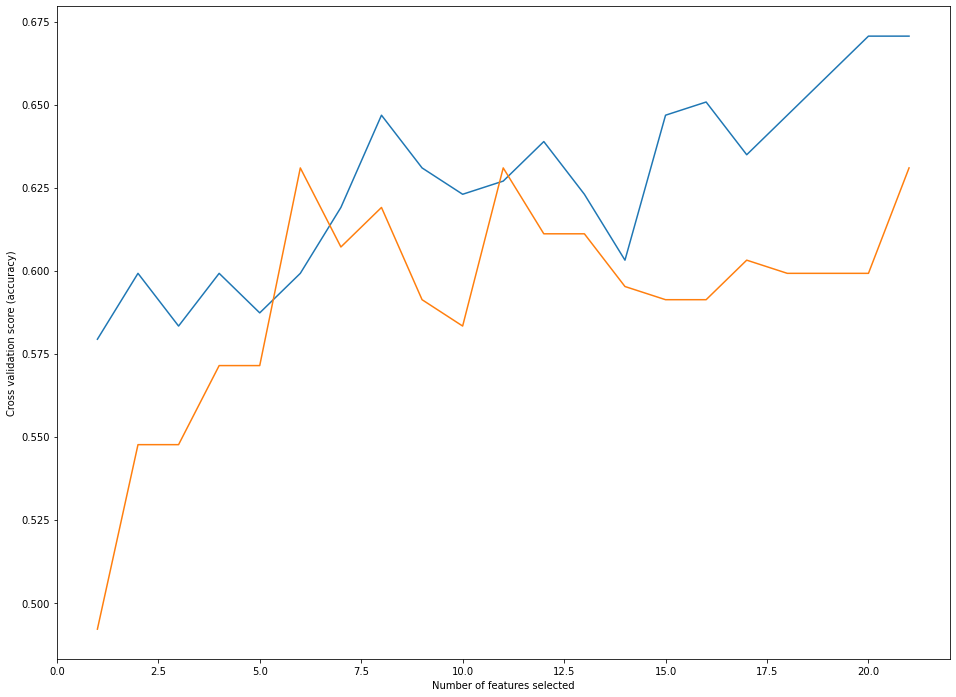

In [21]:
xboost = xgb.XGBClassifier()

new_features = graph_var_importance(xboost, x, y)
new_x = x[new_features]

[19:53:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/opt/python/envs/default/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/python/envs/default/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/python/envs/default/lib/python3.8/site-packages/xgboost/sklearn.py:

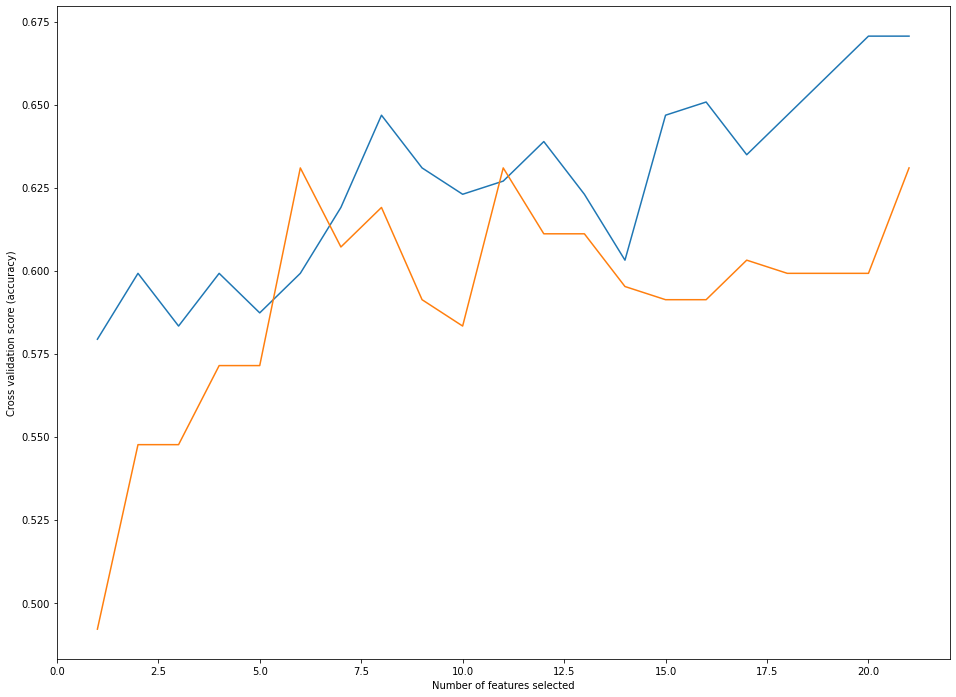

In [22]:
new_features = graph_var_importance(xboost, new_x, y)
new_x = x[new_features]

In [23]:
# graph_var_importance(xboost, new_x, y)

In [24]:
xboost.fit(x_train, y_train)
pred = xboost.predict(x_test)

[19:54:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/python/envs/default/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [25]:
print('test score: ', accuracy_score(y_test, pred))
print('train score: ', xboost.score(x_train, y_train))

test score:  0.6188118811881188
train score:  1.0


In [26]:
x_train, x_test, y_train, y_test = train_test_split(new_x, y, train_size=0.6)

In [27]:
xboost.fit(x_train, y_train)
pred = xboost.predict(x_test)
print('test score: ', accuracy_score(y_test, pred))
print('train score: ', xboost.score(x_train, y_train))

[19:54:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
test score:  0.6138613861386139
train score:  1.0


/opt/python/envs/default/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x_aux, y, train_size=0.6)

In [29]:
xboost.fit(x_train, y_train)
pred = xboost.predict(x_test)
print('test score: ', accuracy_score(y_test, pred))
print('train score: ', xboost.score(x_train, y_train))

[20:10:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
test score:  0.6534653465346535
train score:  1.0


/opt/python/envs/default/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [30]:
xboost = xgb.XGBClassifier(learning_rate=0.05, n_estimators=1500, max_depth=4, eval_metric='auc', eta=0.005, min_child_weight=0.5)
xboost.fit(x_train, y_train)
pred = xboost.predict(x_test)
print('test score: ', accuracy_score(y_test, pred))
print('train score: ', xboost.score(x_train, y_train))

test score:  0.6435643564356436
train score:  1.0


/opt/python/envs/default/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [31]:
light = lgb.LGBMClassifier(
    max_depth=6, 
    learning_rate=0.005, 
    max_bin=4, 
    num_leaves=1000, 
    min_child_weight=1.2,  
)
print(light.get_params())

{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.005, 'max_depth': 6, 'min_child_samples': 20, 'min_child_weight': 1.2, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 1000, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': 'warn', 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'max_bin': 4}


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_aux, y, test_size=0.3)

In [33]:
light.fit(x_train, y_train)
pred = light.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          no       0.59      0.40      0.48        67
         yes       0.62      0.78      0.69        85

    accuracy                           0.61       152
   macro avg       0.60      0.59      0.58       152
weighted avg       0.61      0.61      0.60       152



<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

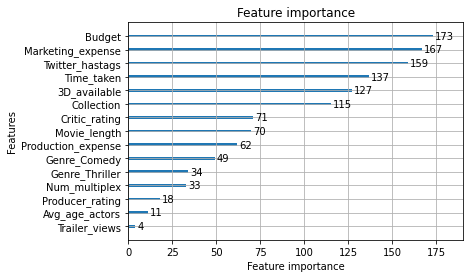

In [34]:
lgb.plot_importance(light)